In [136]:
import numpy as np
from PIL import Image

import copy

In [284]:
im = np.zeros((64,64), dtype=int)

In [285]:
im[0:64, 0:5] = 255
im[0:64, 60:64] = 120

In [286]:
def show(im):
    return Image.fromarray(im)

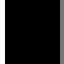

In [287]:
show(im*255)

In [288]:
nn_interpolation = copy.deepcopy(im)

In [289]:
intp_found = False
max_distance = 64

for x, row in enumerate(im):
    for y, value in enumerate(row):
        if value == 0:
            i = 0
            while not intp_found and i < max_distance:
                i+=1
                if y-i >= 0:
                    left = im[x, y-i]
                    if left > 0:
                        nn_interpolation[x,y] = left
                        intp_found = True
                        break

                if y+i < im.shape[1]:
                    right = im[x, y+i]
                    if right > 0:
                        nn_interpolation[x,y] = right
                        intp_found = True
                        break

                if x-i >= 0:
                    up = im[x-i, y]
                    if up > 0:
                        nn_interpolation[x,y] = up
                        intp_found = True
                        break

                if x+i < im.shape[0]:
                    down = im[x+i, y]
                    if down > 0:
                        nn_interpolation[x,y] = down
                        intp_found = True
                        break
            
        intp_found = False





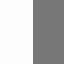

In [290]:
show(nn_interpolation*255)